In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17464789/17464789 [==============================] - 2s 0us/step


In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

In [9]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

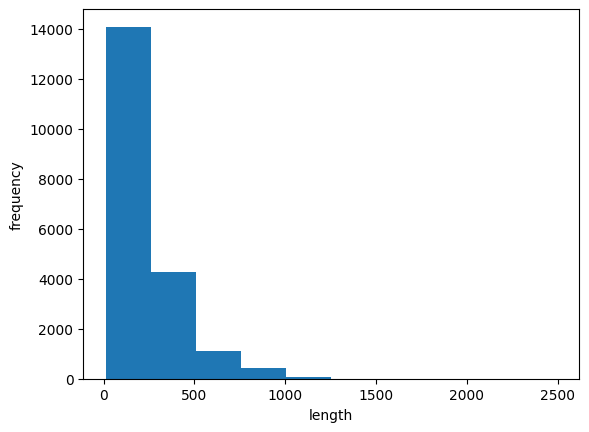

In [11]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [15]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6974 - accuracy: 0.5123 - val_loss: 0.6950 - val_accuracy: 0.5128
Epoch 2/100
 16/313 [>.............................] - ETA: 3s - loss: 0.6962 - accuracy: 0.5088

C:\Users\gyeol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6845 - accuracy: 0.5584 - val_loss: 0.6783 - val_accuracy: 0.5732
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6683 - accuracy: 0.6055 - val_loss: 0.6656 - val_accuracy: 0.6090
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6545 - accuracy: 0.6338 - val_loss: 0.6523 - val_accuracy: 0.6424
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6390 - accuracy: 0.6645 - val_loss: 0.6370 - val_accuracy: 0.6672
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6207 - accuracy: 0.6931 - val_loss: 0.6191 - val_accuracy: 0.6862
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6026 - accuracy: 0.7133 - val_loss: 0.6023 - val_accuracy: 0.7104
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5852 - accuracy: 0.7310 - val_loss: 0.5872 - val_accuracy: 0.7194
Epoc

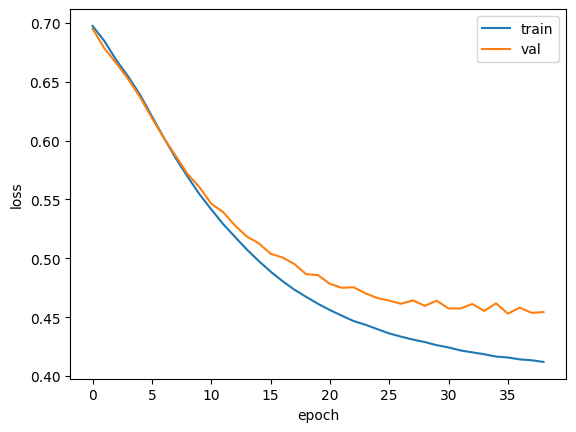

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4932 - accuracy: 0.7658 - val_loss: 0.7211 - val_accuracy: 0.6080
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4914 - accuracy: 0.7670 - val_loss: 0.7238 - val_accuracy: 0.6092
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4899 - accuracy: 0.7681 - val_loss: 0.7248 - val_accuracy: 0.6118
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4883 - accuracy: 0.7697 - val_loss: 0.7270 - val_accuracy: 0.6110


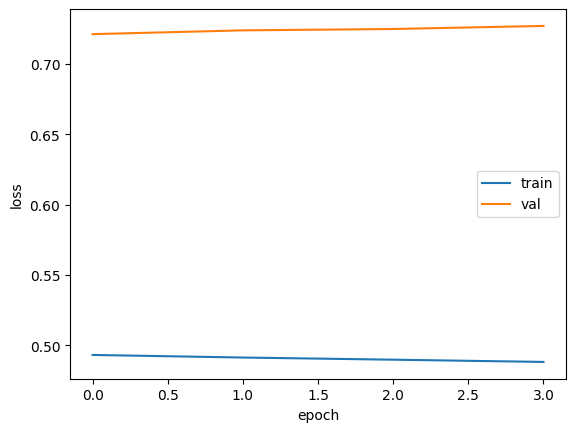

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()